In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


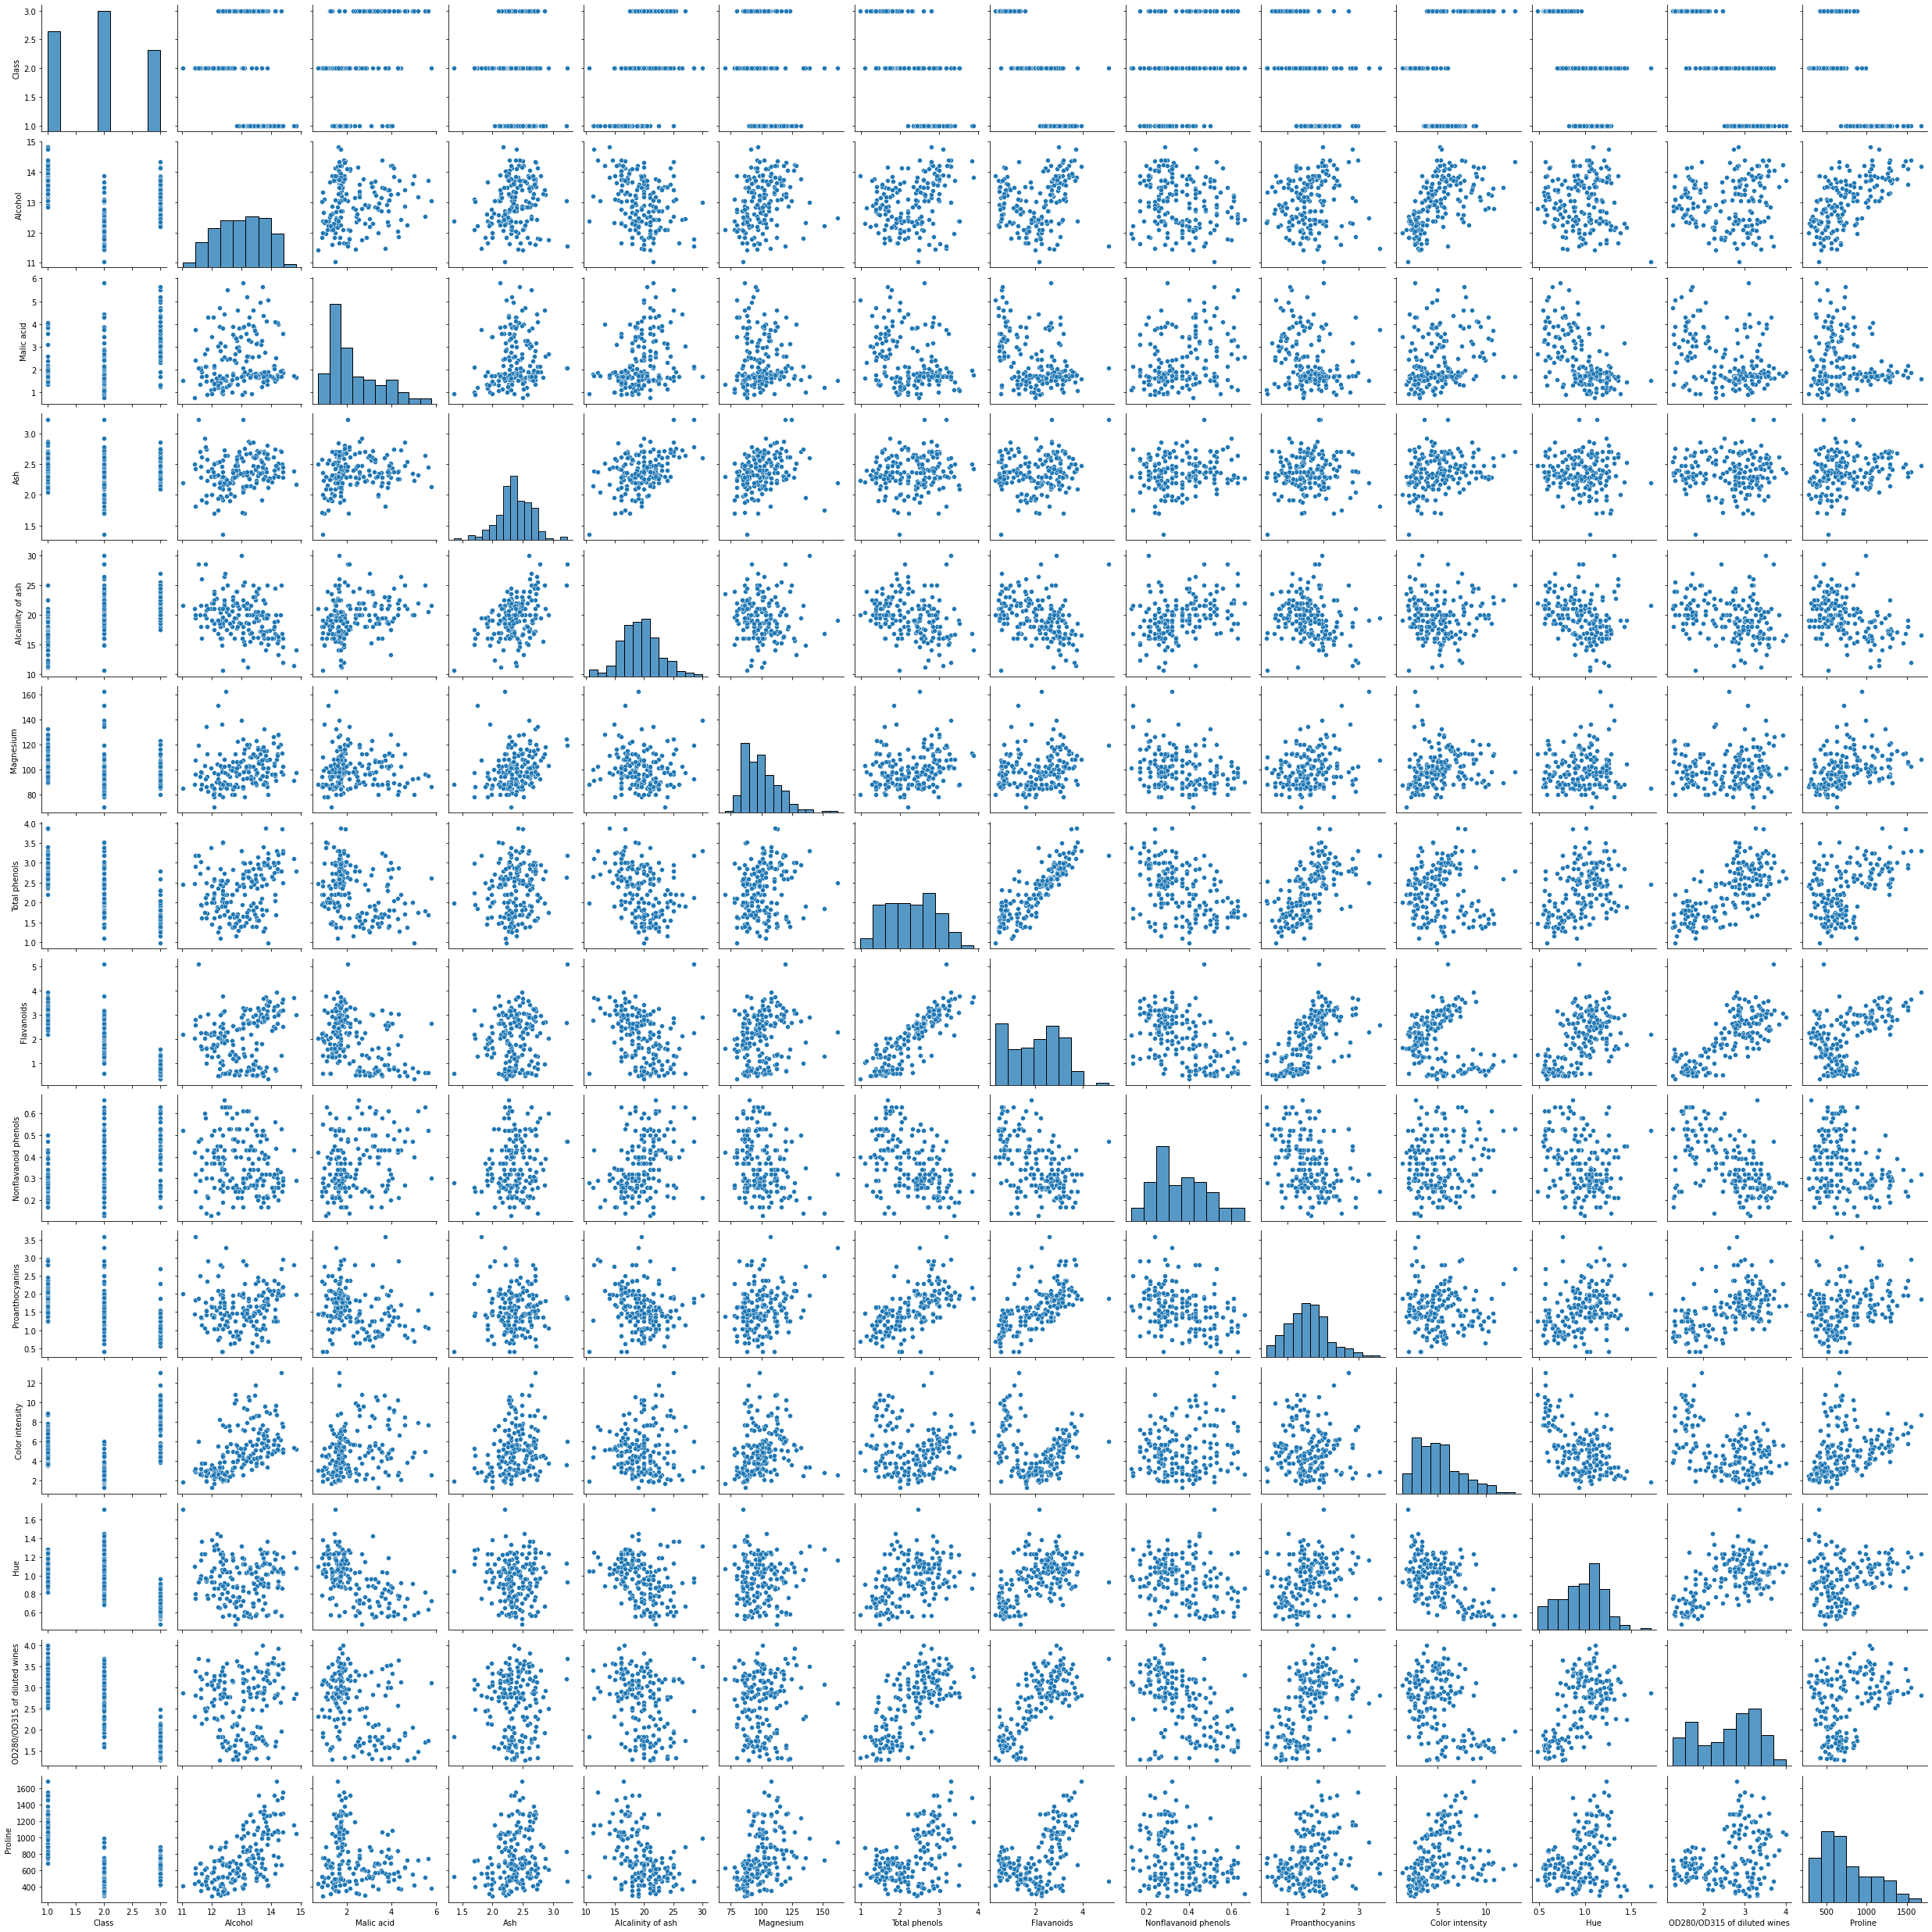

In [3]:
sns.pairplot(wine)

In [19]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
len(wine.columns)-1


13

In [36]:
x = wine.loc[:,wine.columns !='Class']
y = wine['Class']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(np.asarray(x_train))
x_test = scaler.fit_transform(np.asarray(x_test))


In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500,random_state=1)

In [40]:
clf.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500, random_state=1)

In [41]:
clf.predict_proba(x_test)

array([[9.99570121e-01, 1.37706064e-05, 4.16108353e-04],
       [1.40251454e-03, 9.98590931e-01, 6.55443433e-06],
       [9.93108719e-01, 4.13581328e-03, 2.75546770e-03],
       [8.47665504e-04, 1.15965660e-03, 9.97992678e-01],
       [9.98548279e-01, 2.50509807e-04, 1.20121112e-03],
       [9.64569095e-01, 3.54160977e-02, 1.48068520e-05],
       [1.96732976e-03, 9.97921924e-01, 1.10746409e-04],
       [7.79363972e-05, 7.85394894e-05, 9.99843524e-01],
       [1.05332567e-02, 3.86831332e-02, 9.50783610e-01],
       [1.03787143e-03, 5.01780192e-04, 9.98460348e-01],
       [1.17766581e-02, 9.88222911e-01, 4.30857326e-07],
       [9.99887624e-01, 1.69962793e-05, 9.53798990e-05],
       [9.55228779e-04, 2.67143253e-04, 9.98777628e-01],
       [1.92360370e-04, 9.99774314e-01, 3.33261056e-05],
       [1.83221852e-02, 3.22810407e-03, 9.78449711e-01],
       [9.99992404e-01, 3.89912524e-06, 3.69726757e-06],
       [9.94115518e-02, 8.79560088e-01, 2.10283600e-02],
       [2.26807018e-04, 8.78211

In [42]:
clf.score(x_test, y_test)

0.9259259259259259

In [44]:
y_pred = clf.predict(x_test)

In [45]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average=None)

In [46]:
f1

array([0.85714286, 0.91304348, 1.        ])

In [47]:
from sklearn.metrics import recall_score
recall = f1_score(y_test, y_pred, average=None)
recall

array([0.85714286, 0.91304348, 1.        ])

In [53]:
from sklearn.metrics import recall_score
recall = f1_score(y_test, y_pred, average=None)
recall

array([0.85714286, 0.91304348, 1.        ])

In [49]:
from sklearn.metrics import precision_score
p = precision_score(y_test, y_pred, average=None)
p

array([0.75, 1.  , 1.  ])

In [51]:
data = {'Scores':['F1','Recall', 'Precision'],'Class 1': [f1[0],recall[0],p[0]], 'Class 2': [f1[1],recall[1],p[1]],'Class 3': [f1[2],recall[2],p[2]]}  
result = pd.DataFrame(data)

In [52]:
result.set_index(["Scores"])

,Class 1,Class 2,Class 3
Scores,,,
F1,0.857143,0.913043,1.0
Recall,0.857143,0.913043,1.0
Precision,0.750000,1.000000,1.0


In [55]:
clf.coefs_

[array([[-2.43625728e-01,  3.71435806e-01, -4.42661701e-01,
         -2.89015309e-01, -5.57534689e-01, -5.09429155e-01,
         -2.50519148e-01,  5.59155056e-02,  3.11946431e-02,
         -1.20540244e-01, -9.90770029e-02,  3.47284653e-01,
         -3.36918185e-01],
        [ 3.01374739e-01, -5.85546634e-01,  2.47690699e-01,
          1.21488882e-01,  7.65197369e-02, -5.33187346e-01,
         -2.33662487e-01,  4.46402066e-01,  3.29312056e-01,
         -3.27907434e-01,  1.94528070e-01,  2.30739444e-01,
          4.00379942e-01],
        [-3.24527974e-01, -4.70679542e-01, -2.44882581e-01,
          4.61468124e-01, -4.29067288e-01, -2.19965750e-01,
          5.14154737e-01,  2.27231903e-01,  1.38408945e-01,
         -3.07351080e-01,  1.58188182e-01,  3.15867194e-01,
         -4.81328444e-01],
        [ 3.74202710e-01,  3.08945763e-01,  3.67905750e-01,
         -6.81200713e-02,  4.70395133e-01, -5.75516683e-01,
         -8.79489833e-02,  4.91412004e-01, -3.40323896e-01,
         -9.8317751

In [56]:
clf.intercepts_

[array([ 0.23865895, -0.01032233,  0.39326964,  0.20380464,  0.12392014,
         0.19813922,  0.3187415 ,  0.30651092, -0.05232682, -0.31323749,
         0.03907073,  0.29511725, -0.26993229]),
 array([ 0.33908506, -0.2757715 , -0.12250269,  0.23254287, -0.03127286,
         0.45016504,  0.10155826,  0.25545141,  0.67387956, -0.02523046,
        -0.18076215,  0.36904698,  0.18760118]),
 array([ 0.18459538,  0.47086698,  0.27186003,  0.10470588,  0.12785615,
        -0.46776346, -0.02783718, -0.00761717,  0.18914228,  0.02432257,
         0.07993634, -0.24283692, -0.29629228]),
 array([-0.01728674,  0.40067959, -0.33183293])]